<span style="font-size:2em;">**Canadian immigration from 1980 to 2013: Matplotlib vs Seaborn vs Plotly**</span>

Analyzing the canadian immigration while making a data visualization cheat sheet for matplotlib, seaborn and plotly. The following types of plots are covered:

- Line Plots
- Area Plots
- Histograms
- Bar Plots
- Pie Charts
- Boxplots
- Scatter Plots
- Bubble Plots
- Heatmaps

# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
import math
import itertools
from IPython.display import Image

# Data Processing

In [2]:
def load_sheet(path:str, sheet_name: str):
    return pd.read_excel(path, sheet_name=sheet_name, skiprows=range(20), skipfooter=2)

In [3]:
df_canada = load_sheet('../data/raw/Canada.xlsx', 'Canada by Citizenship')
df_canada.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,...,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,...,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,...,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,...,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,...,930,909,875,1033,1018,1018,933,851,982,1121


In [4]:
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada['Total'] = df_canada.sum(axis=1)

/var/folders/xt/8sxc97b127n0yx4s5xdv5wch0000gn/T/ipykernel_33968/4155380707.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_canada['Total'] = df_canada.sum(axis=1)


In [5]:
df_canada.set_index('Country', inplace=True)
df_canada.columns = list(map(str, df_canada.columns))

In [6]:
years = list(map(str, range(1980, 2014)))

# Data Visualization

In [7]:
%matplotlib inline 

In [8]:
mpl.style.use(['ggplot'])

In [9]:
pio.renderers.default = "png"

## Single Line Plots

A line plot is a plot in the form of a series of data points connected by straight line segments. The best use case for a line plot is when you have a continuous dataset and you're interested in visualizing the data over a period of time.

**How was the immigration from Haiti to Canada from 1980 to 2013?**

In 2010, Haiti suffered a magnitude 7.0 earthquake. Let's visualize the Government of Canada's effort to accept refugees from Haiti.

In [10]:
haiti = df_canada.loc['Haiti', years]
haiti.index = haiti.index.map(int)  # Change the index values of Haiti to type integer for plotting

### Matplotlib

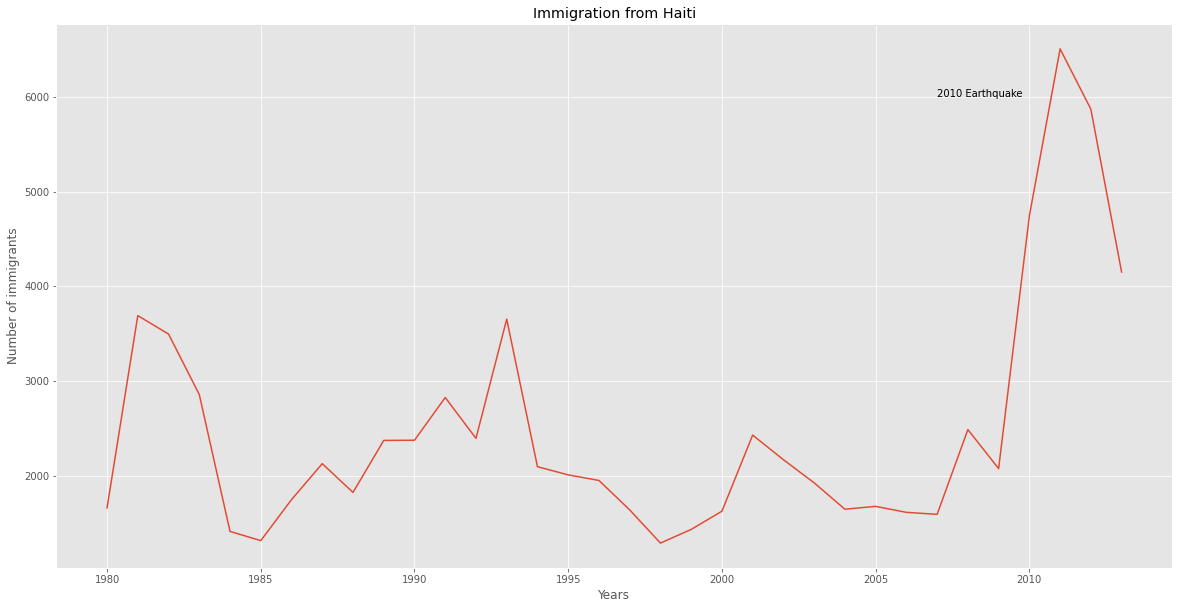

In [11]:
ax = haiti.plot(kind='line', figsize=(20,10))
ax.set(title='Immigration from Haiti', ylabel='Number of immigrants', xlabel='Years')
plt.text(2007, 6000, '2010 Earthquake');  # Annotate plot with the 2010 earthquake 

### Seaborn

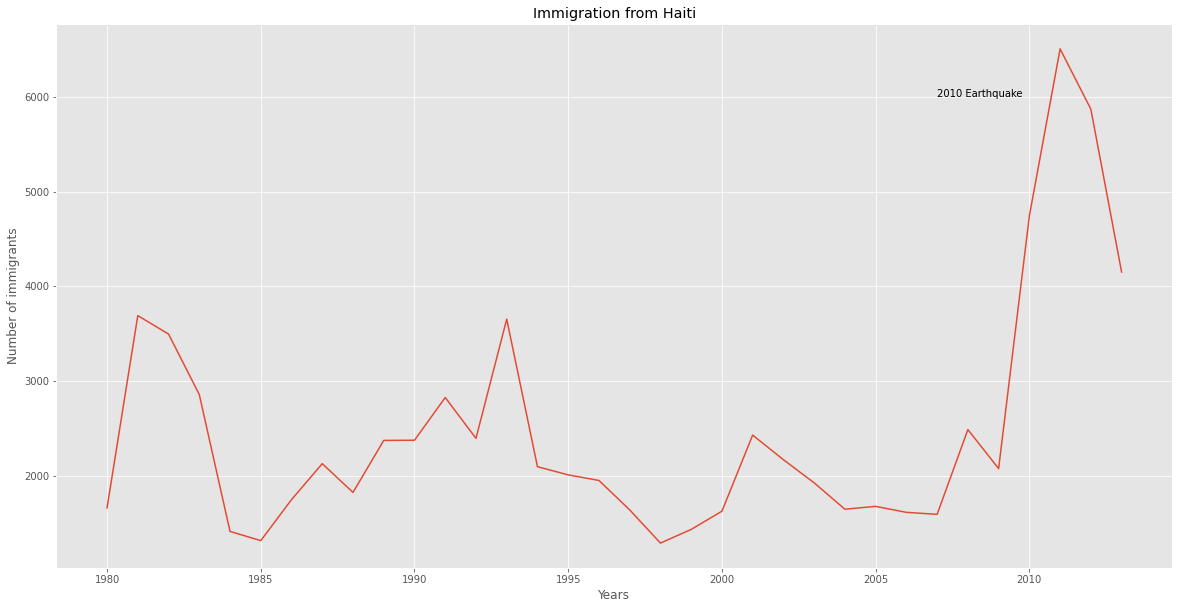

In [12]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=haiti)
ax.set(title='Immigration from Haiti', ylabel='Number of immigrants', xlabel='Years')
plt.text(2007, 6000, '2010 Earthquake');  # Annotate plot with the 2010 earthquake 

### Plotly

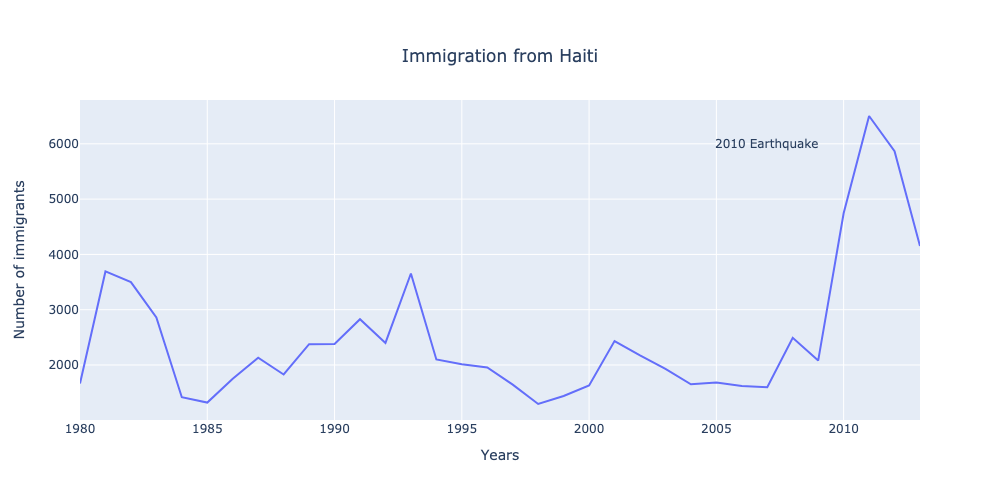

In [13]:
fig = px.line(haiti, 
              title='Immigration from Haiti', 
              width=1000, 
              height=500, 
              labels={"index": "Years", "value": 'Number of immigrants'})
fig = fig.update_layout(showlegend=False, 
                        title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})  # Center title
annotation = {'x': 2007, 'y': 6000, 'text': '2010 Earthquake', 'showarrow': False} # Annotate plot with the 2010 earthquake 
fig.add_annotation(annotation)
fig.show()

It's clear that the number of immigrants from Haiti spiked up after the 2010 Earthquake.

## Multiple Line Plots

**Which countries contributed the most to immigration to Canada?**

In [14]:
df_canada.sort_values(by='Total', ascending = False, axis = 0, inplace = True)
df_top5 = df_canada.head(5)
df_top5 = df_top5[years].transpose()
df_top5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
df_top5.index = df_top5.index.map(int)

### Matplotlib

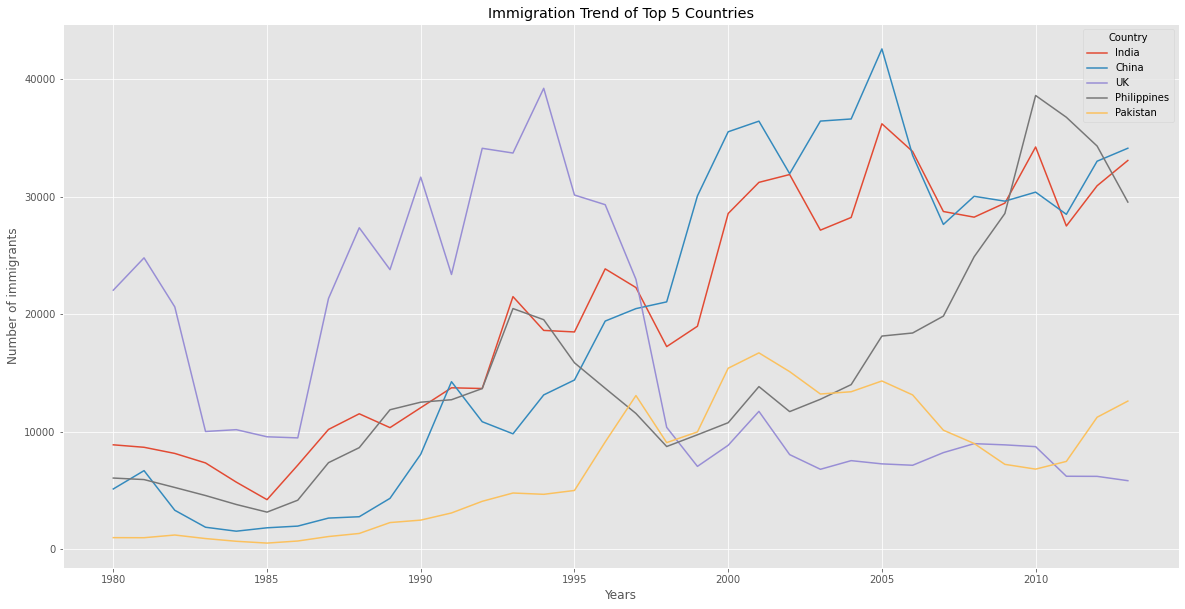

In [15]:
ax = df_top5.plot(kind='line', figsize=(20,10))
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Seaborn

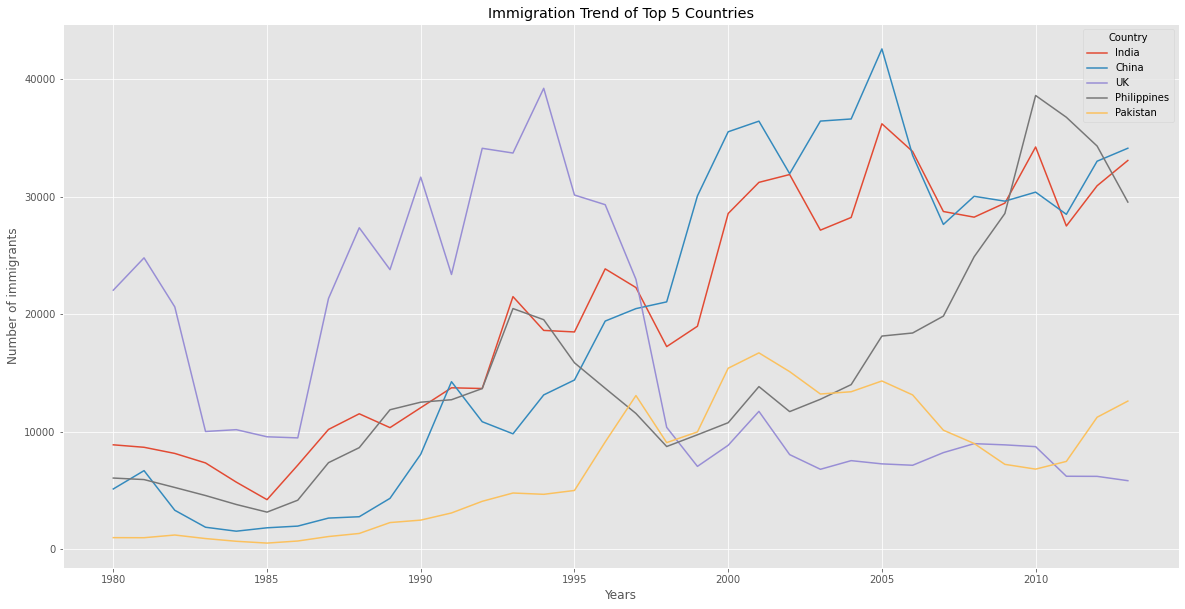

In [16]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(data=df_top5, dashes=False)
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Plotly

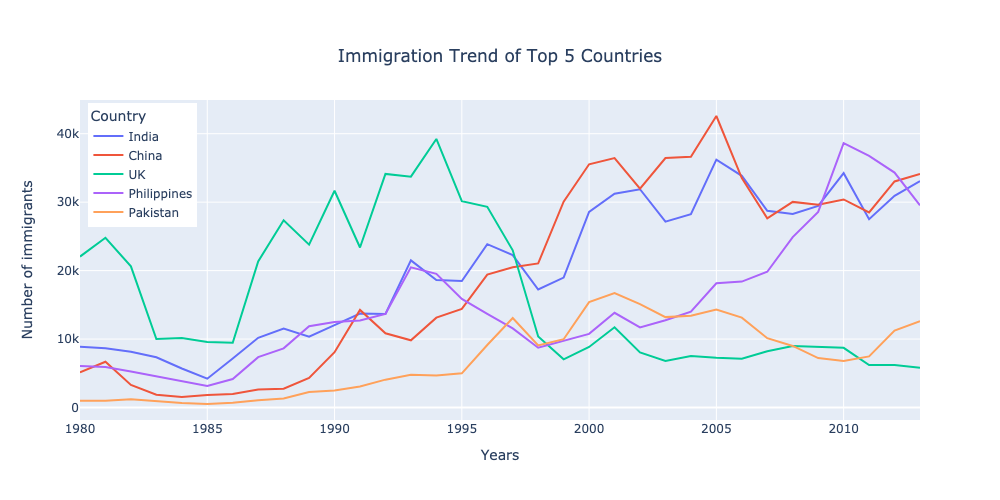

In [17]:
fig = px.line(df_top5, 
              title='Immigration Trend of Top 5 Countries', 
              width=1000, 
              height=500, 
              labels={"index": "Years", "value": 'Number of immigrants'})
# Center title and move legend to the left
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

India, China, United Kingdom, Philippines and Pakistan are the top 5 countries that contributed the most to immigration to Canada. However, not all show an uptrend.

## Area Plots

An area plot is a type of plot that depicts accumulated totals using numbers or percentages over time. It is based on the line plot and is commonly used when trying to compare two or more quantities. 

**Which countries contributed the most to immigration to Canada? (Same question as in the previous section)**

### Matplotlib

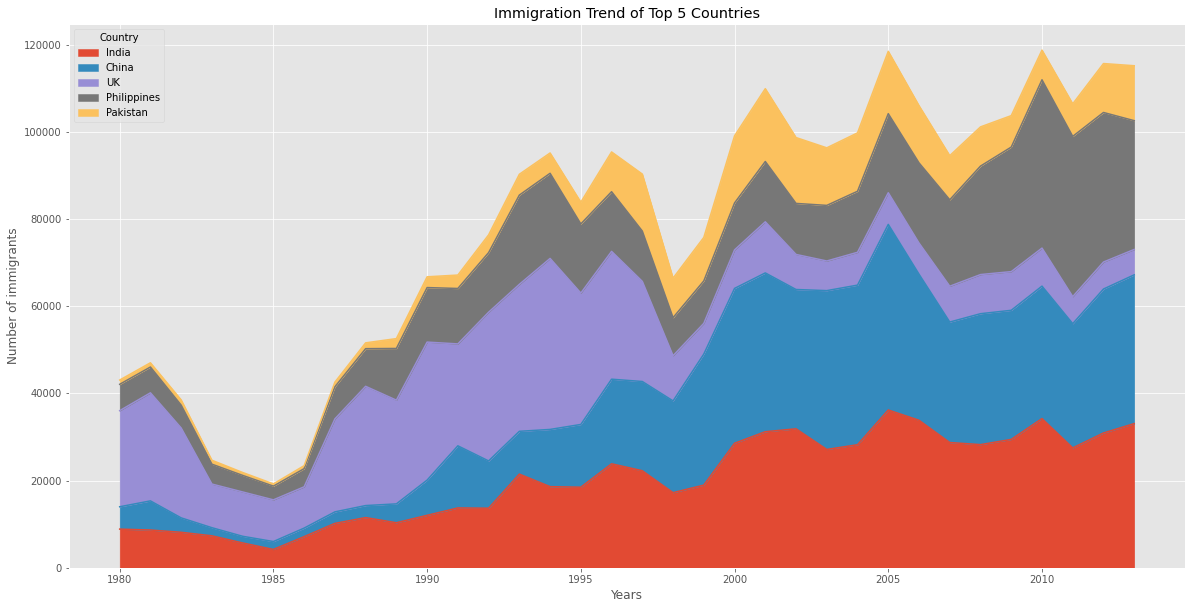

In [18]:
ax = df_top5.plot(kind = 'area', figsize=(20,10))
ax.set(title='Immigration Trend of Top 5 Countries', ylabel='Number of immigrants', xlabel='Years');

### Seaborn

Not available

### Plotly

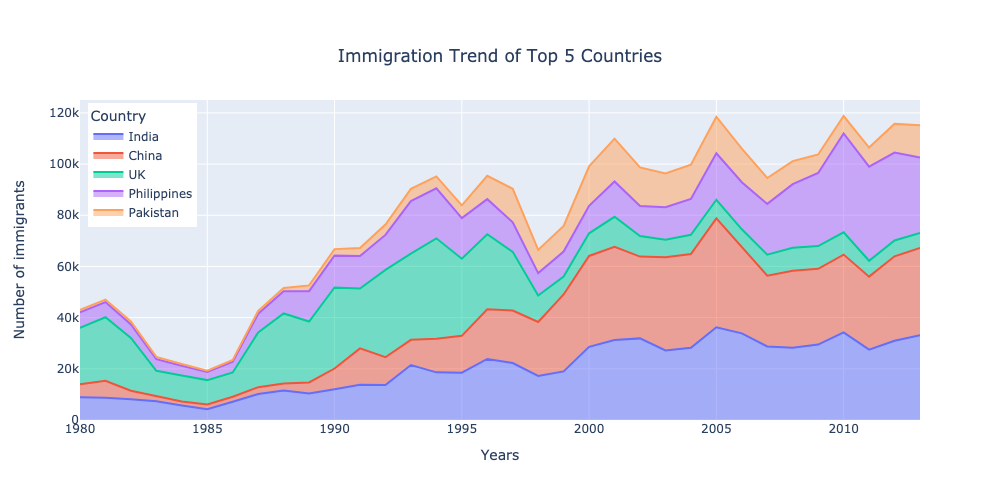

In [19]:
fig = px.area(df_top5, 
              title='Immigration Trend of Top 5 Countries', 
              width=1000, 
              height=500, 
              labels={"index": "Years", "value": 'Number of immigrants'})
# Center Title and Move Legend to the left
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig.show()

## Single Histograms

A histogram is a way of representing the frequency distribution of a numeric dataset. It partitions the spread of the numeric data into bins, assigns each datapoint in the dataset to a bin, and then counts the number of datapoints that have been assigned to each bin. So the vertical axis is actually the frequency or the number of datapoints in each bin. 

**What is the number of new immigrants from the various countries to Canada in 2013?**

In [20]:
bin_counts, bin_edges = np.histogram(df_canada['2013'])

### Matplotlib

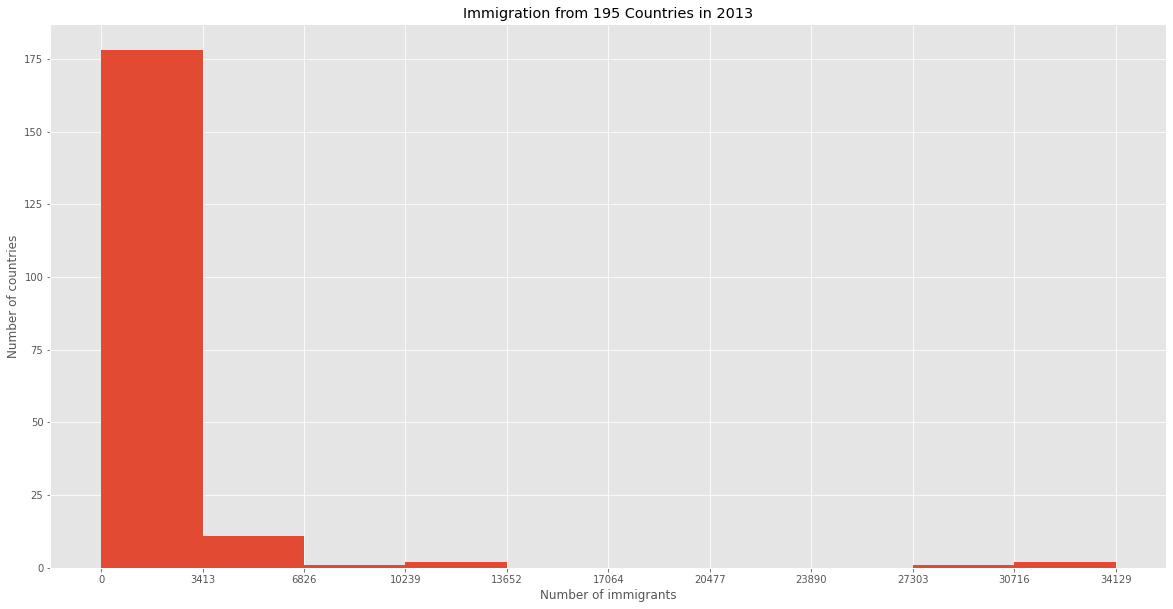

In [21]:
ax = df_canada['2013'].plot(kind='hist', figsize=(20,10), xticks=bin_edges)
ax.set(title='Immigration from 195 Countries in 2013', 
       ylabel='Number of countries', 
       xlabel='Number of immigrants');

### Seaborn

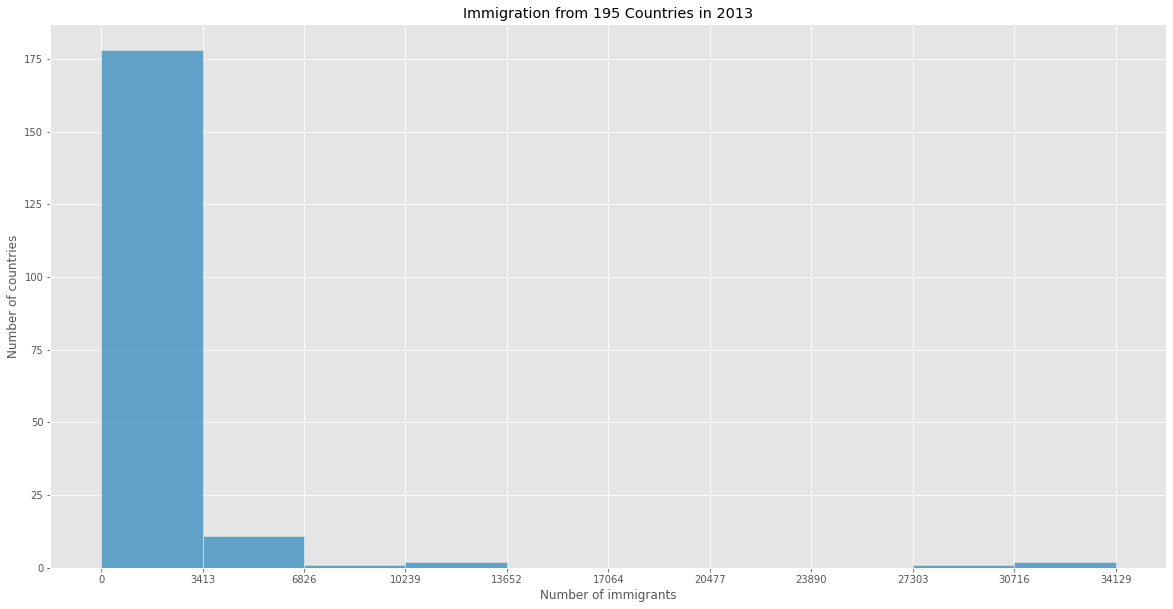

In [22]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_canada['2013'], bins=bin_edges)
plt.xticks(bin_edges)
ax.set(title='Immigration from 195 Countries in 2013', 
       ylabel='Number of countries', 
       xlabel='Number of immigrants');

### Plotly

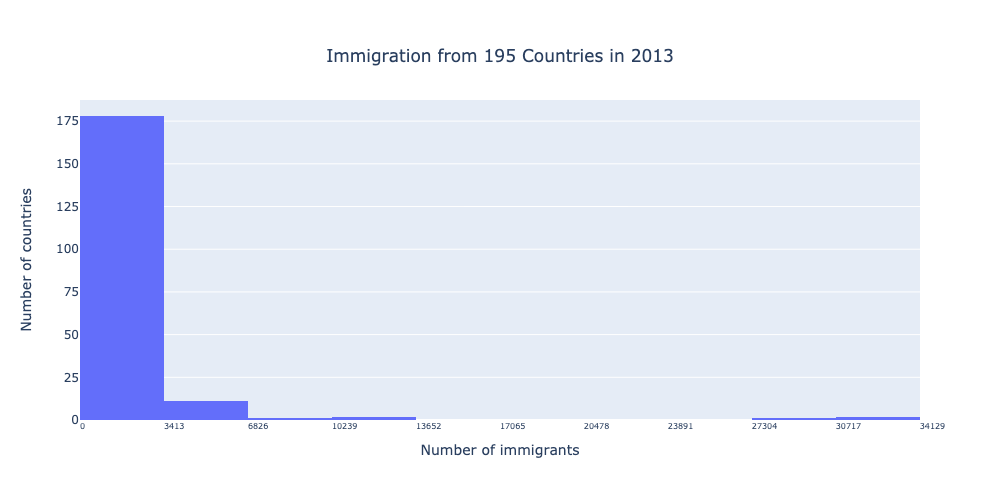

In [23]:
fig = go.Figure(go.Histogram(x=df_canada['2013'], xbins=dict(start=0, end=bin_edges[-1]+1, size=bin_edges[1]+1)))
fig.update_layout(title_text='Immigration from 195 Countries in 2013', 
                  xaxis_title_text='Number of immigrants',
                  yaxis_title_text='Number of countries', 
                  title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  width=1000, 
                  height=500)
fig.update_xaxes(tickangle=0, 
                 tickmode = 'array',
                 tickvals = bin_edges, 
                 ticktext= [math.ceil(tick) for tick in bin_edges], 
                 ticklabelposition="outside right",
                 tickfont_size=8)
fig.update_yaxes(tickvals=np.arange(0,200,25))
fig.show()

Although there are some outliers, the number of new immigrants from most countries to Canada in 2013 is below 7000.

## Multiple Histograms

 **What is the immigration distribution for Denmark, Norway, and Sweden from 1980 to 2013?**

In [24]:
df_dns = df_canada.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
bin_counts, bin_edges = np.histogram(df_dns, 15)

### Matplotlib

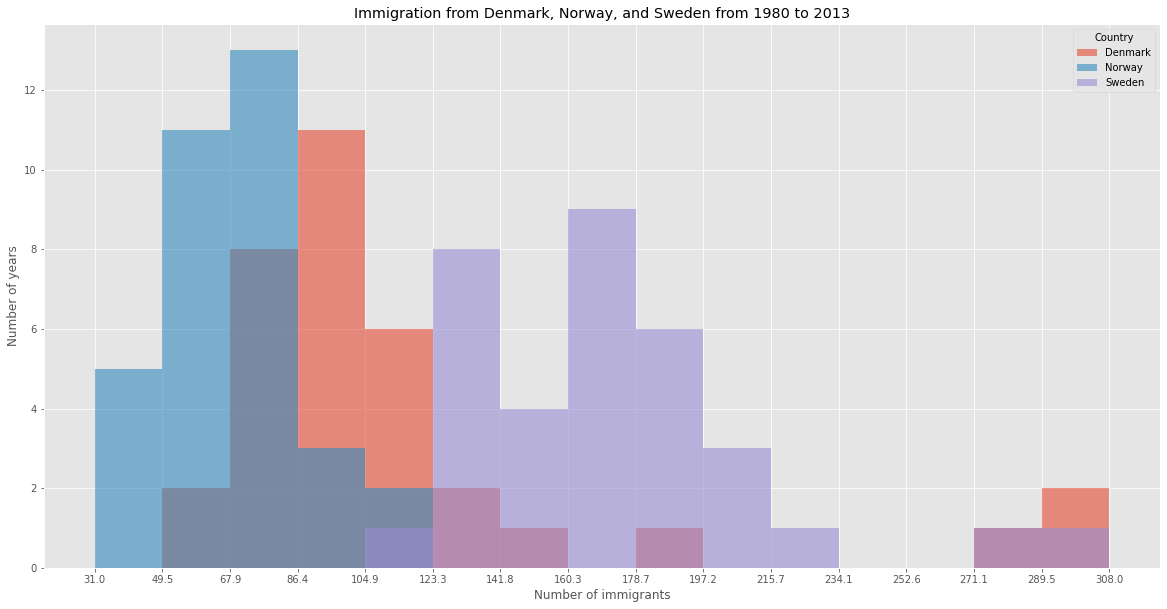

In [25]:
ax = df_dns.plot(kind='hist', figsize=(20,10),bins=15, xticks=bin_edges, alpha=0.6)
ax.set(title='Immigration from Denmark, Norway, and Sweden from 1980 to 2013', 
       ylabel='Number of years', 
       xlabel='Number of immigrants');

### Seaborn

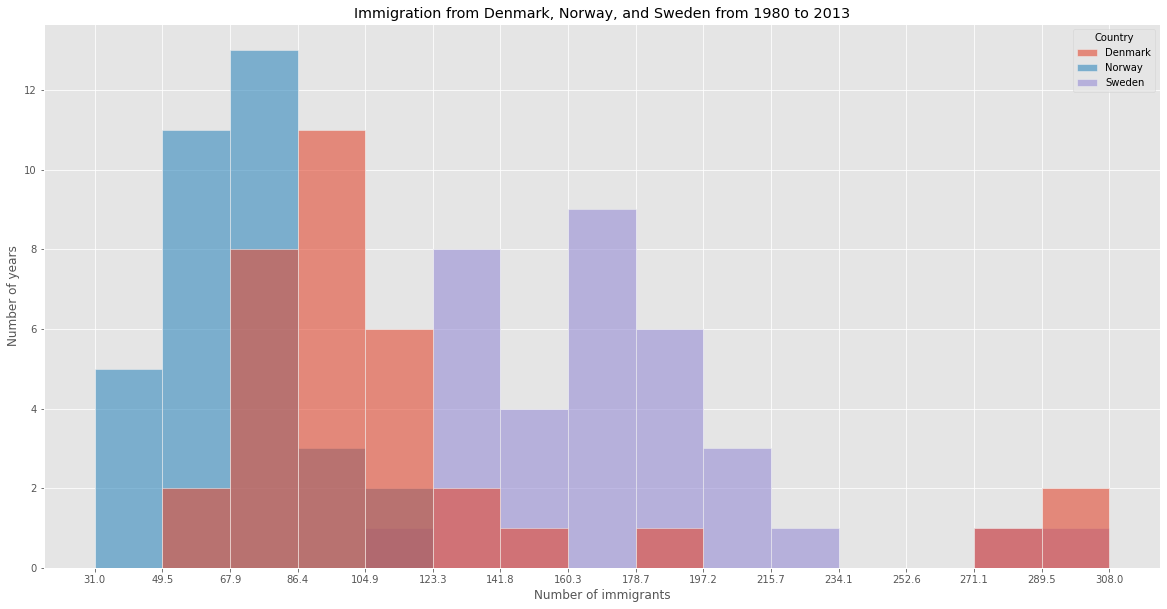

In [26]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data=df_dns, bins=bin_edges, alpha=0.6)
plt.xticks(bin_edges)
ax.set(title='Immigration from Denmark, Norway, and Sweden from 1980 to 2013', 
       ylabel='Number of years', 
       xlabel='Number of immigrants');

### Plotly

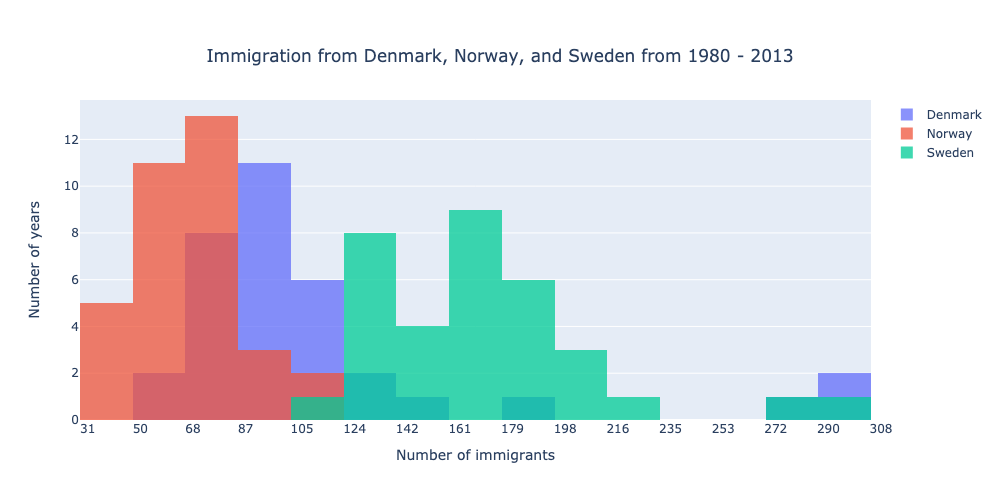

In [27]:
xbins = {'start':31, 'end':330, 'size':18.5}
opacity = 0.75
fig = go.Figure(go.Histogram(x=df_dns['Denmark'], name='Denmark', xbins=xbins, opacity=opacity))
fig.add_trace(go.Histogram(x=df_dns['Norway'], name='Norway', xbins=xbins,opacity=opacity))
fig.add_trace(go.Histogram(x=df_dns['Sweden'], name='Sweden', xbins=xbins, opacity=opacity))
fig.update_layout(barmode="overlay", 
                  width=1000, 
                  height=500, 
                  title_text='Immigration from Denmark, Norway, and Sweden from 1980 - 2013', 
                  xaxis_title_text='Number of immigrants',
                  yaxis_title_text='Number of years', 
                  title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_xaxes(tickmode = 'array', 
                 tickvals =bin_edges, 
                 ticktext= [math.ceil(tick) for tick in bin_edges], 
                 ticklabelposition="outside right",
                 tickfont_size=12)
fig.show()

Among these three countries, Sweden is the one with the most people choosing Canada to live.

## Vertical Bar Plots

A bar chart is a type of plot where the length of each bar is proportional to the value of the item that it represents. It is commonly used to compare the values of a variable at a given point in time. 

In a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale. 

**What is the number of Icelandic immigrants to Canada from 1980 to 2013?**

Iceland faced a massive economic crisis between 2008 and 2011. Let's see if this crisis influenced the number of immigrants to Canada.

In [28]:
df_iceland = df_canada.loc['Iceland', years]

### Matplotlib

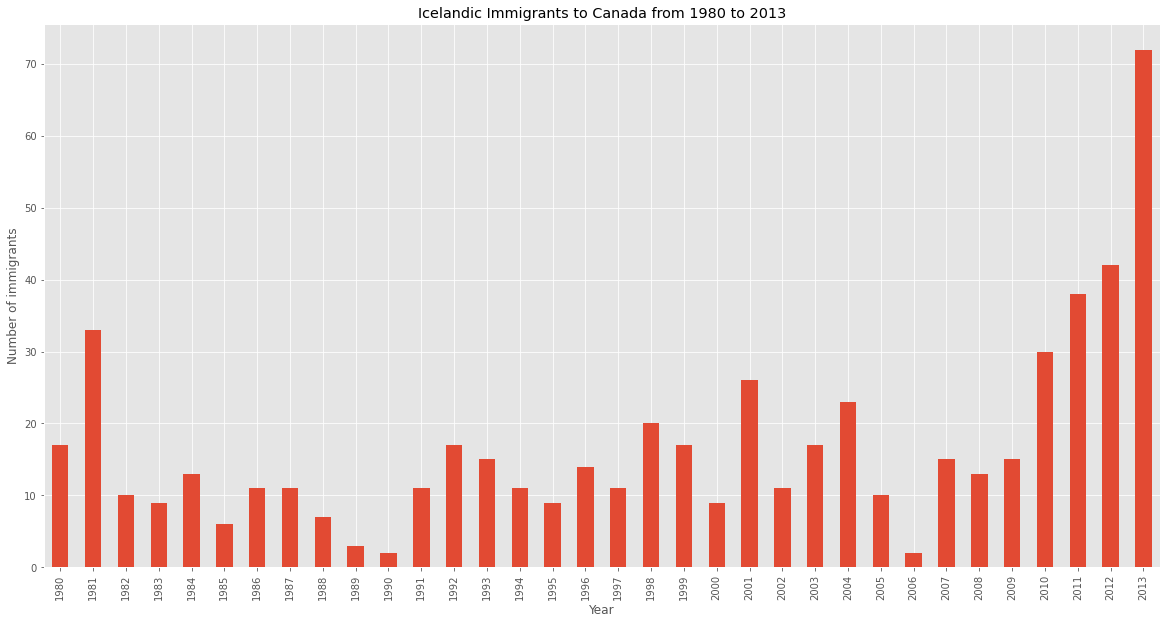

In [29]:
ax = df_iceland.plot(kind='bar', figsize=(20, 10))
ax.set(title='Icelandic Immigrants to Canada from 1980 to 2013', ylabel='Number of immigrants', xlabel='Year');

### Seaborn

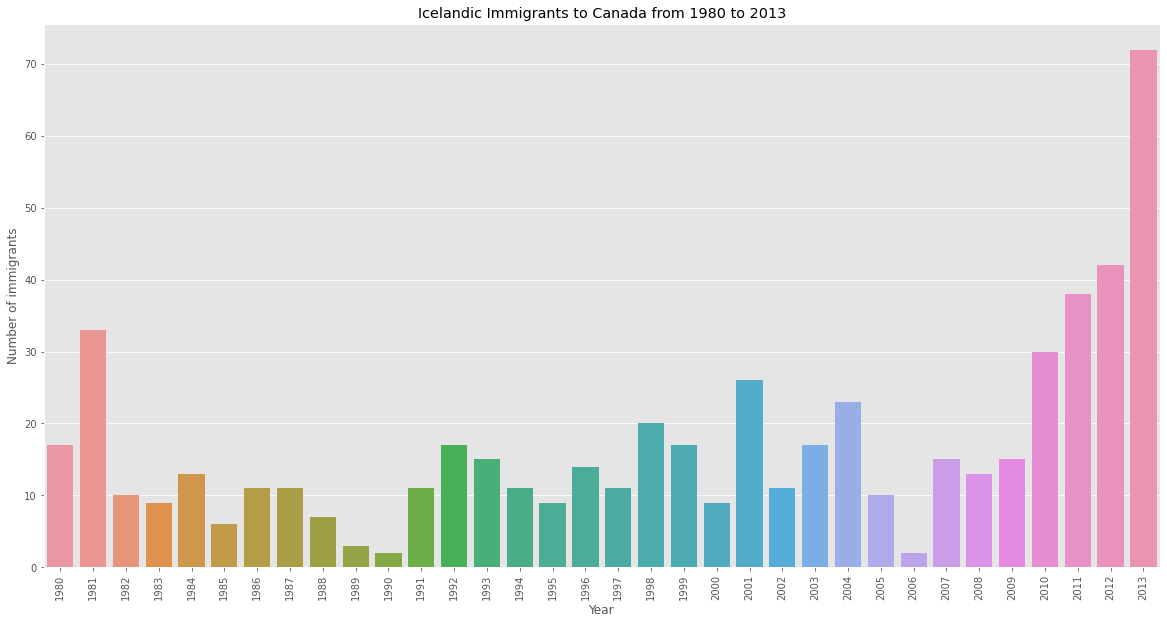

In [30]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df_iceland.index, y=df_iceland.values)
ax.set(title='Icelandic Immigrants to Canada from 1980 to 2013', ylabel='Number of immigrants', xlabel='Year')
plt.xticks(rotation=90);

### Plotly

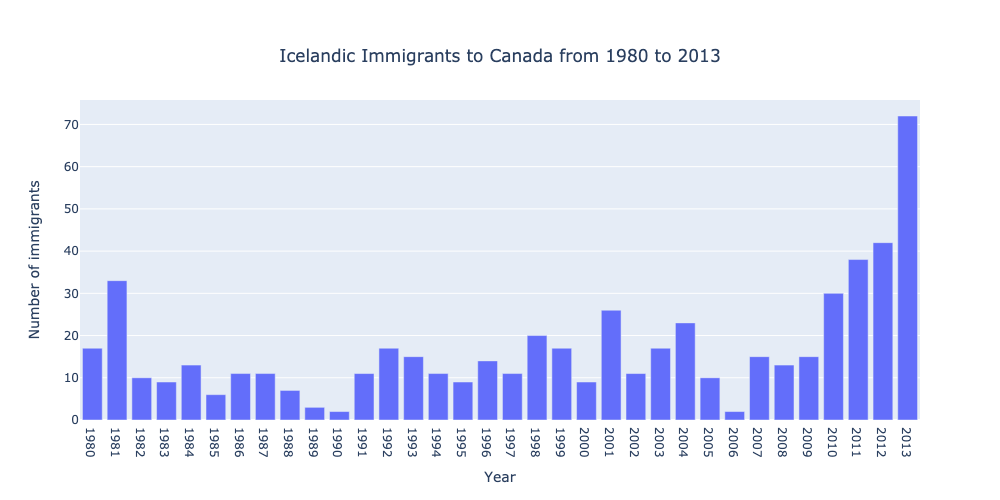

In [31]:
iceland = pd.DataFrame({'Year': df_iceland.index, 'Number of immigrants': df_iceland.values})
fig = px.bar(iceland, 
             x='Year', 
             y='Number of immigrants', 
             width=1000, 
             height=500, 
             title='Icelandic Immigrants to Canada from 1980 to 2013')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

The number of Icelandic immigrants in Canada began to increase rapidly after the start of the 2008 crisis.

## Horizontal Bar Plots

**What is the total number of immigrants to Canada from the top 15 countries, from 1980 to 2013?**

In [32]:
df_canada.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_canada['Total'].tail(15)

### Matplotlib

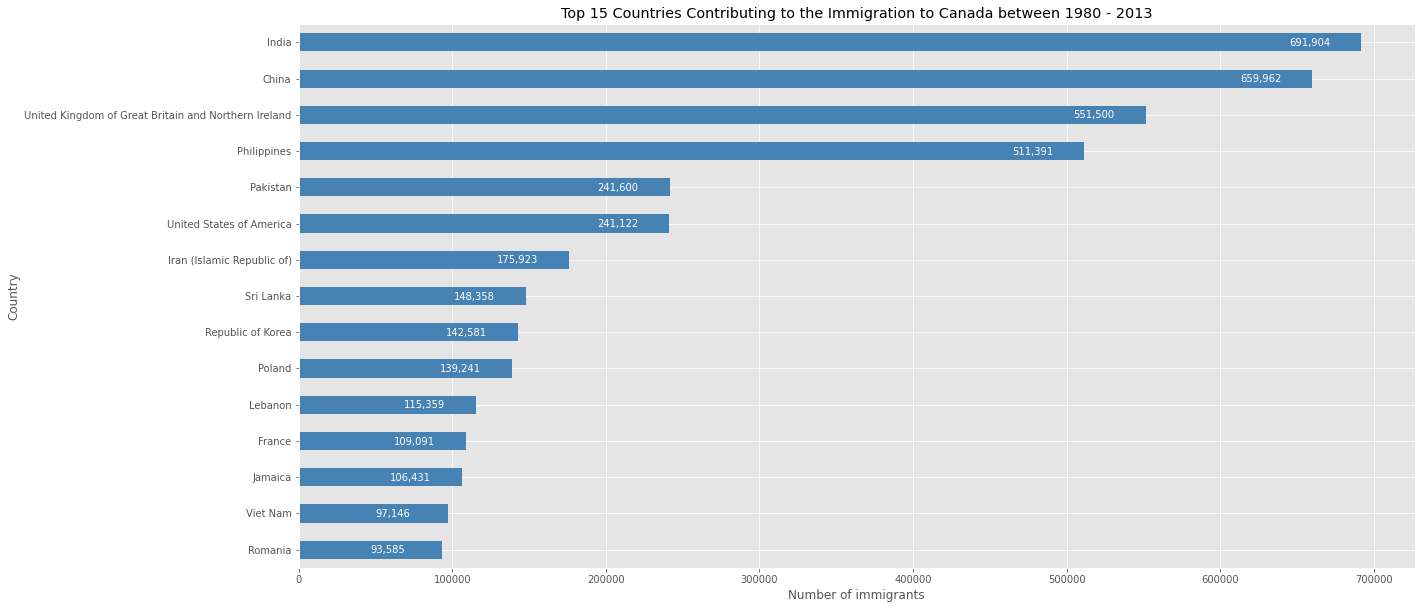

In [33]:
ax = df_top15.plot(kind='barh', figsize=(20, 10), color='steelblue')
ax.set(title='Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013', 
       xlabel='Number of immigrants');
# Annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',')
    # Place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white') 

### Seaborn

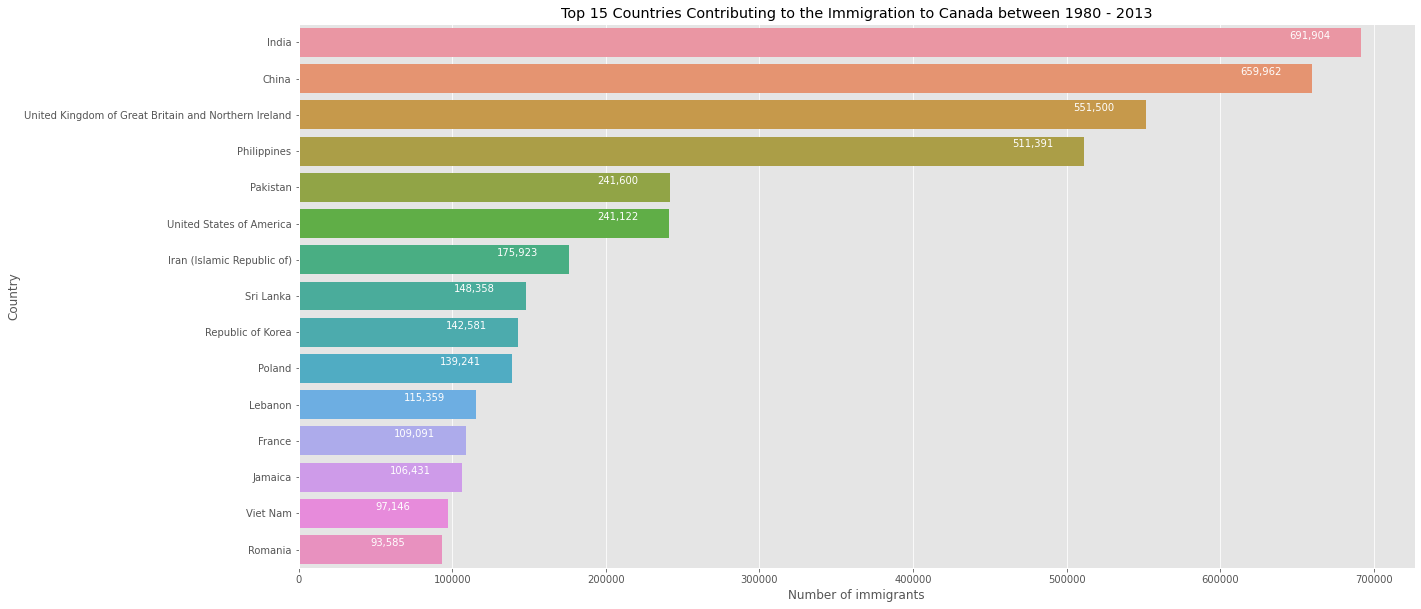

In [34]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y=df_top15.index, x=df_top15.values, orient='h', order=df_top15.index[::-1])
ax.set(title='Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013', 
       xlabel='Number of immigrants');
# Annotate value labels to each country
for index, value in enumerate(df_top15[::-1]): 
    label = format(int(value), ',')
    # Place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white') 

### Plotly

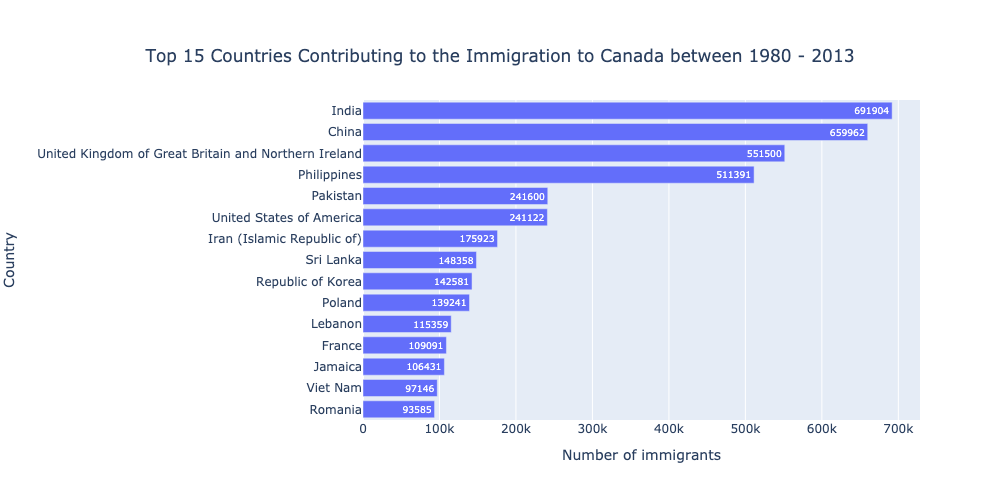

In [35]:
df_top15.sort_values(ascending=False, inplace=True)
fig = px.bar(df_top15, 
             y=df_top15.index, 
             x=df_top15.values, 
             text = df_top15.values, 
             width=1000, 
             height=500, 
             orientation='h', 
             category_orders={'Country': df_top15.index}, 
             title='Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        xaxis_title_text="Number of immigrants")
fig.show()

## Pie Charts

A pie chart is a circular statistical graphic divided into slices to illustrate numerical proportion. Pie charts are an alternative to bar charts, although most experts believe pie charts are less visually informative.

**What is the percentage of new immigrants grouped by continents from 1980 to 2013?**

In [36]:
df_continents = df_canada.groupby('Continent', axis=0).sum()

### Matplotlib

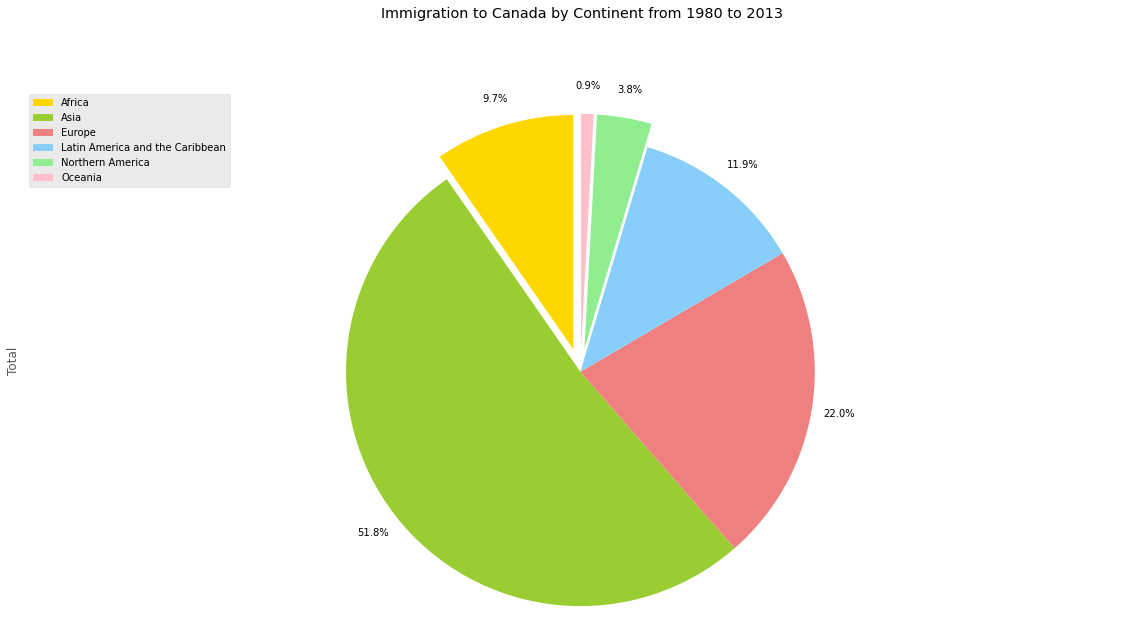

In [37]:
fig = plt.figure()
fig.patch.set_facecolor('white')  # Change background color
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]
df_continents['Total'].plot(kind='pie', 
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            labels=None,         
                            pctdistance=1.12,    
                            colors=colors_list,  
                            explode=explode_list)
plt.title('Immigration to Canada by Continent from 1980 to 2013', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_continents.index, loc='upper left');

### Seaborn

Not available

### Plotly

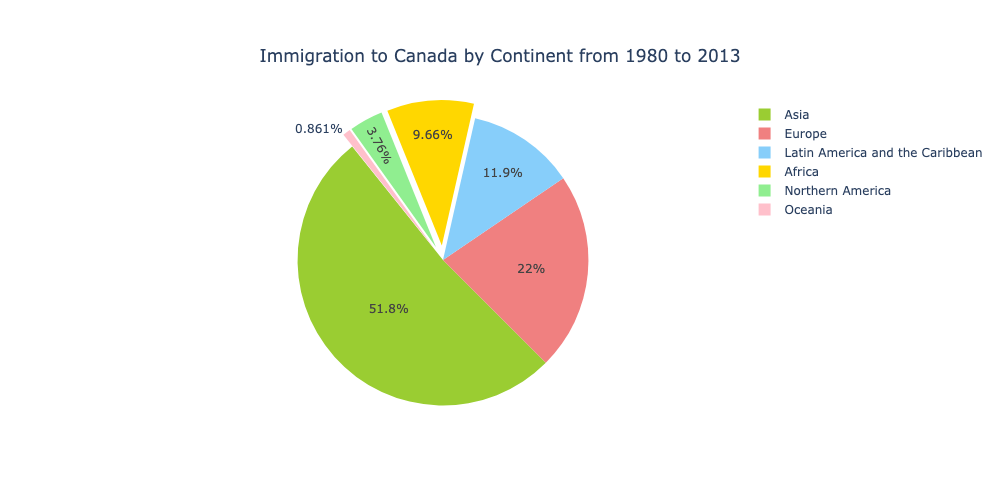

In [38]:
fig = px.pie(df_continents['Total'], 
             values=df_continents['Total'].values, 
             names=df_continents['Total'].index, 
             width=1000, 
             height=500, 
             title='Immigration to Canada by Continent from 1980 to 2013')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_traces(marker=dict(colors=colors_list), rotation=135, pull=[0.1, 0, 0, 0, 0.1, 0.1])
fig.show()

More than 70% of immigrants who go to Canada are Asian or European.

## Boxplots

Boxplots compare the distributions of a numeric variable grouped according to a categorical variable.

A boxplot is a way of statistically representing the distribution of given data through 5 main dimensions. The first dimension is the minimum, and its value can be obtained by subtracting 1.5 times the IQR, where IQR is the interquartile range from the first quartile. The second dimension is the first quartile which is 25% of the way through the sorted data. In other words, 1/4 of the data points are less than this value. The third dimension is the median. The fourth dimension is the third quartile, which is 75% through the sorted data. In other words, 3/4 of the data points are less than this value. And the final dimension is the maximum, which is the highest number in the sorted data where maximum equals the third quartile summed with 1.5 multiplied by IQR. Finally, boxplots also display outliers as individual dots that occur outside the upper and lower extremes. 

In [39]:
Image(url='../reports/figures/boxplot_example.png', width=400, height=400)

**Compare the distribution of the number of new immigrants from India and China from 1980 to 2013.**

In [40]:
df_ci = df_canada.loc[['China','India'], years].transpose()

### Matplotlib

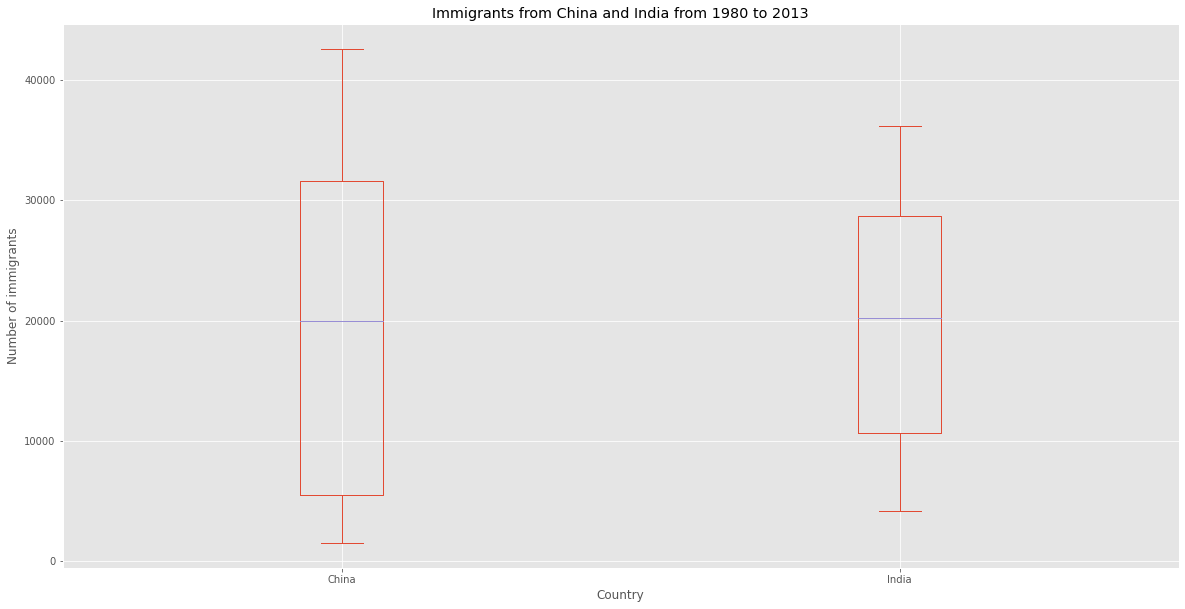

In [41]:
ax = df_ci.plot(kind='box', figsize=(20, 10))
ax.set(title='Immigrants from China and India from 1980 to 2013', xlabel="Country", ylabel='Number of immigrants');

### Seaborn

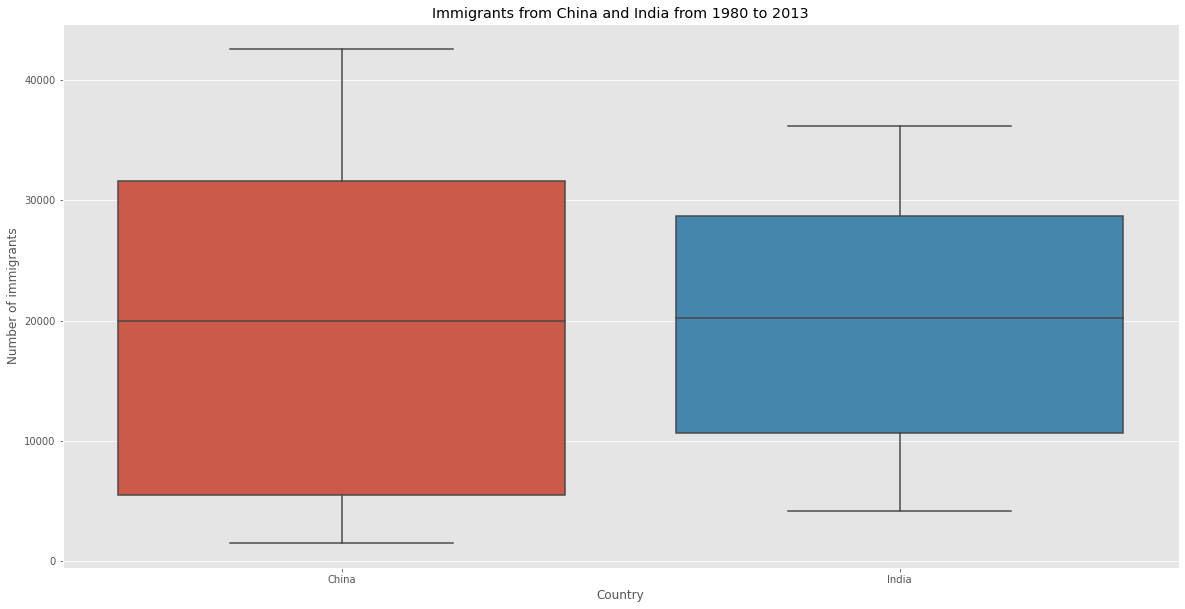

In [42]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df_ci)
ax.set(title='Immigrants from China and India from 1980 to 2013', ylabel='Number of immigrants');

### Plotly

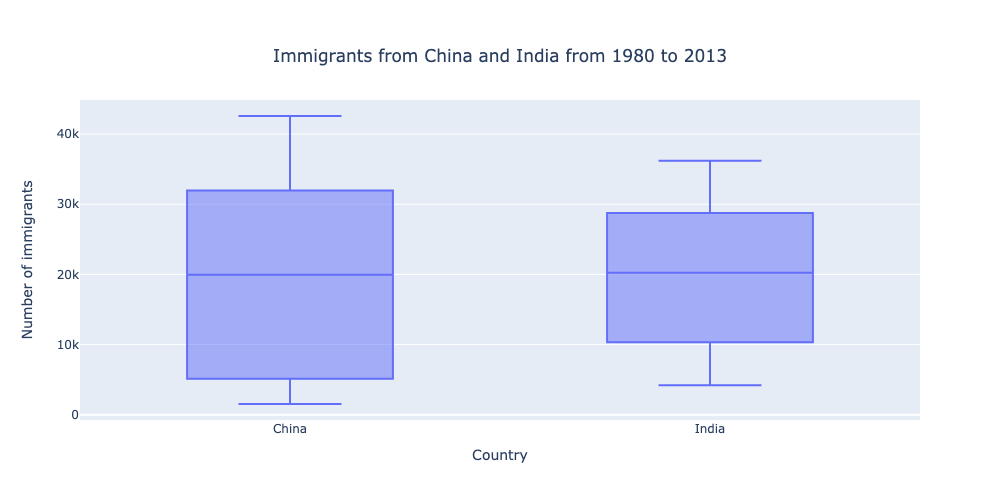

In [43]:
fig = px.box(df_ci, width=1000, height=500, title='Immigrants from China and India from 1980 to 2013')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        yaxis_title_text="Number of immigrants")
fig.show()

Both countries have about the same median (around 20000). However, China's immigrant population range is more spread out than India's. Plus, the maximum population from India (36210) is around 15% lower than the maximum population from China (42584).

## Scatter Plots

A scatter plot is a type of plot that displays values pertaining to typically two variables against each other. Usually it is a dependent variable to be plotted against an independent variable in order to determine if any correlation between the two variables exists. If color-coded, it can also show the relationship with a third categorical variable.

**What is the trend of total immigrantion to Canada from 1980 to 2013?**

In [44]:
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']

### Matplotlib

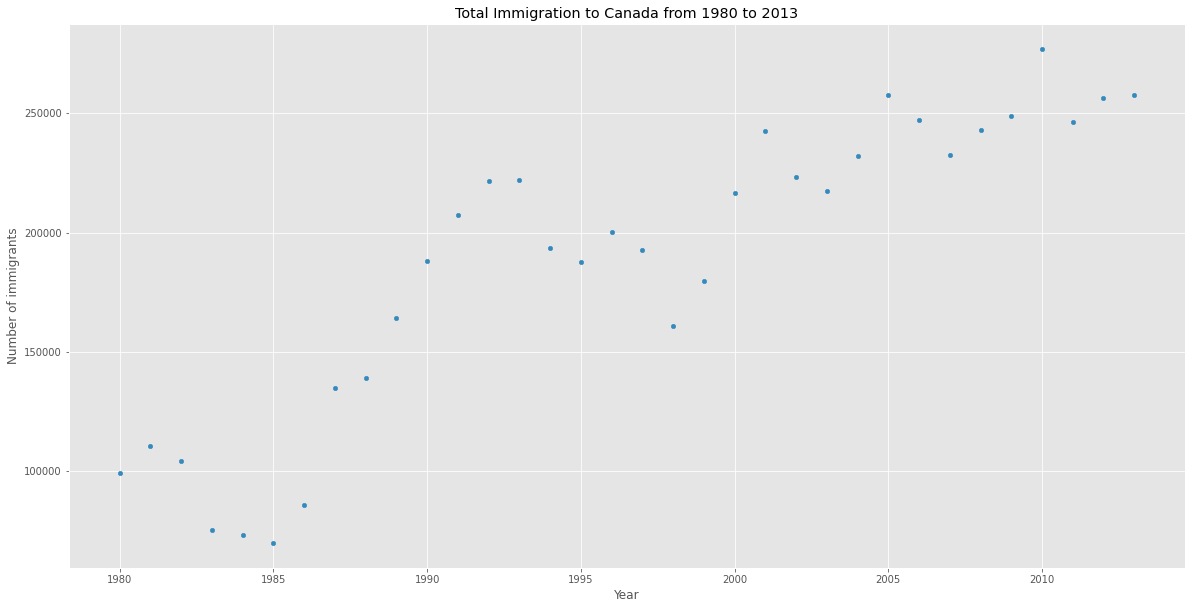

In [45]:
ax = df_total.plot(kind='scatter', x='year', y='total', figsize=(20, 10))
ax.set(title='Total Immigration to Canada from 1980 to 2013', xlabel='Year', ylabel='Number of immigrants');

### Seaborn

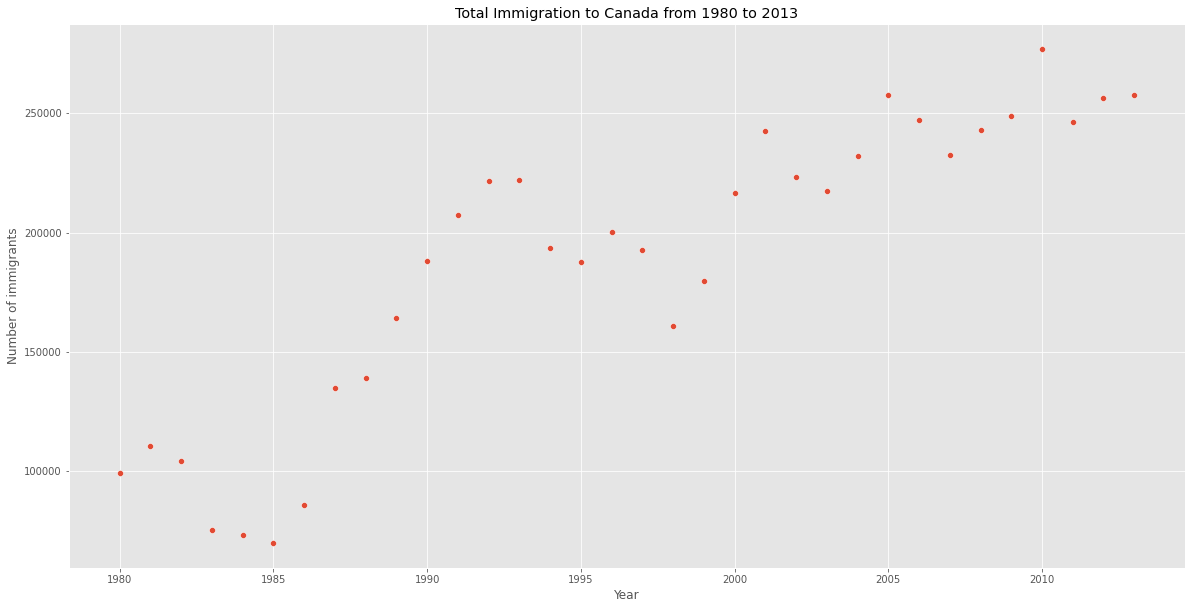

In [46]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df_total, x='year', y='total')
ax.set(title='Total Immigration to Canada from 1980 to 2013', xlabel='Year', ylabel='Number of immigrants');

### Plotly

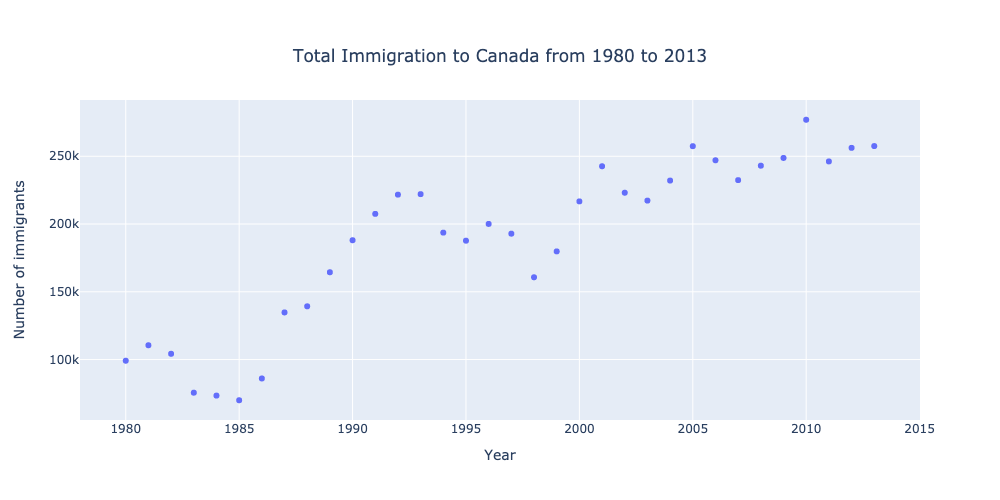

In [47]:
fig = px.scatter(df_total, x='year', y='total', width=1000, height=500, title='Total Immigration to Canada from 1980 to 2013')
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        xaxis_title_text="Year",
                        yaxis_title_text="Number of immigrants")
fig.show()

There is a clear upward trend.

## Bubble Plots

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight.

**Compare the immigration from Brazil and Argentina from 1980 to 2013.**

Argentina suffered a great depression from 1998 to 2002. We can visualize this crisis by looking at immigration data, namely comparing immigration from Argentina with that of Brazil.

In [48]:
df_can_years = df_canada[years].transpose()
df_can_years.index = map(int, df_can_years.index)
df_can_years.index.name = 'Year'
df_can_years.reset_index(inplace=True)
# normalize Brazil data
norm_brazil = (df_can_years['Brazil'] - df_can_years['Brazil'].min()) / (df_can_years['Brazil'].max() - df_can_years['Brazil'].min())
# normalize Argentina data
norm_argentina = (df_can_years['Argentina'] - df_can_years['Argentina'].min()) / (df_can_years['Argentina'].max() - df_can_years['Argentina'].min())

### Matplotlib

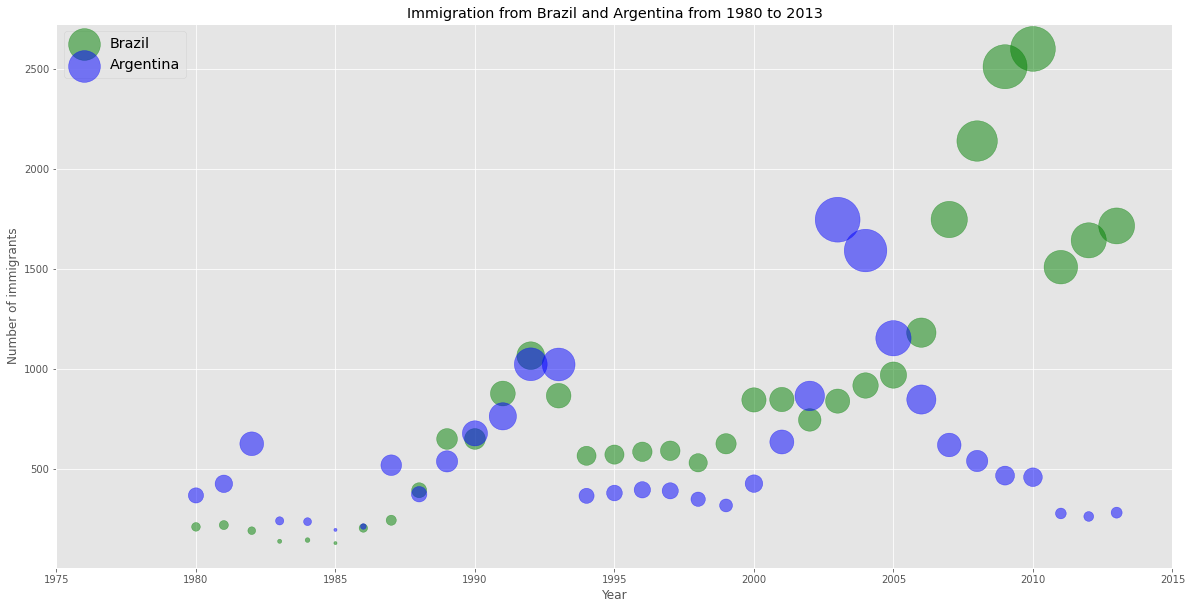

In [49]:
ax0 = df_can_years.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(20, 10),
                    alpha=0.5,                 
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
ax1 = df_can_years.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )
ax0.set(title='Immigration from Brazil and Argentina from 1980 to 2013', ylabel='Number of immigrants');
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large');

### Seaborn

In [50]:
brazil_values = df_canada.loc['Brazil'].values[3:-1]
argentina_values = df_canada.loc['Argentina'].values[3:-1]
df_arg_brz = pd.DataFrame({'Country': ['Brazil']* 34 + ['Argentina']* 34, 
                           'Year': years *2,
                           'Number of immigrants': list(itertools.chain(brazil_values,argentina_values))})

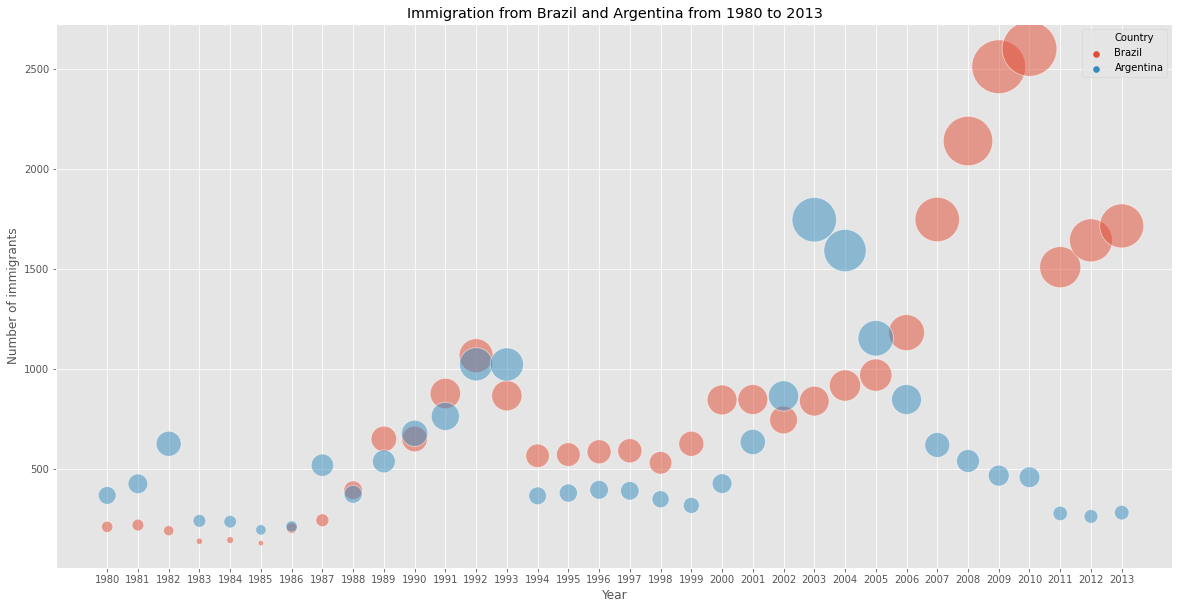

In [51]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(data=df_arg_brz, 
                     x="Year", 
                     y="Number of immigrants", 
                     size="Number of immigrants", 
                     hue="Country", 
                     alpha=0.5, 
                     sizes=(30, 3000))
# Remove legend with the sizes of the bubbles
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels[:3]);

ax.set(title='Immigration from Brazil and Argentina from 1980 to 2013', xlabel='Year', ylabel='Number of immigrants');

### Plotly

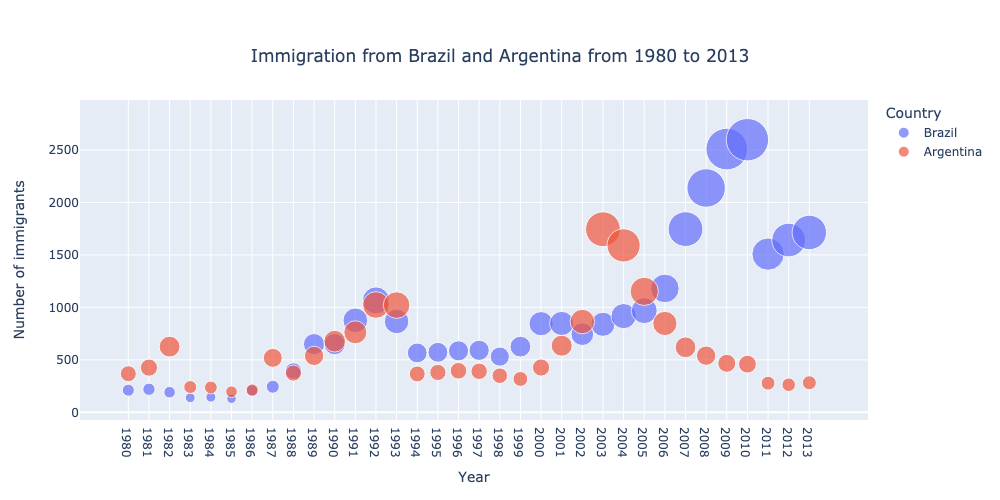

In [52]:
fig = px.scatter(df_arg_brz, 
                 x="Year", 
                 y="Number of immigrants", 
                 size="Number of immigrants", 
                 color="Country", 
                 size_max=30,
                 title='Immigration from Brazil and Argentina from 1980 to 2013',
                 width=1000, 
                 height=500)
fig = fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

There is an increase in immigration from Argentina from 1998 to 2002. A similar spike between 1985 and 1993 can also be seen. Argentina struggled with a similar phenomenon from 1974 to 1990.

In 1999, the Brazilian currency dropped nearly 35%. The economy slowly recovered over the years, culminating in a surge in 2010, which is depicted in the above chart.

## Heatmaps

A heatmap is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

**Visualize the total immigration of the top 5 countries grouped by decade.**

In [53]:
df_top5 = df_canada.sort_values(['Total'], ascending=False, axis=0).head(5)
df_80s = df_top5.loc[:, list(map(str, range(1980, 1990))) ].sum(axis=1) 
df_90s = df_top5.loc[:, list(map(str, range(1990, 2000))) ].sum(axis=1) 
df_00s = df_top5.loc[:, list(map(str, range(2000, 2010)))].sum(axis=1)
df_top5_decades = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})
df_top5_decades.index = ['India', 'China', 'UK', 'Philippines', 'Pakistan'] # Rename UK

### Matplotlib

In [54]:
# Adapted from: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

def heatmap(data, row_labels, col_labels, cmap, cbarlabel):
    ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, cmap, aspect='auto')
    # Set Matplotlib colorbar size to match graph
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0.7)
    # Create colorbar
    cbar = plt.colorbar(im, cax=cax, orientation="horizontal")
    cbar.ax.set_xlabel(cbarlabel, labelpad=10)
    # Set ticks
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    return ax, im, cbar 


def annotate_heatmap(im, data=None, valfmt="{x:d}", textcolors=("black", "white"), threshold=None):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    # Set default alignment to center, but allow it to be overwritten by textkw.
    kw = dict(horizontalalignment="center", verticalalignment="center")
    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)
    # Loop over the data and create a `Text` for each "pixel". Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
    return texts

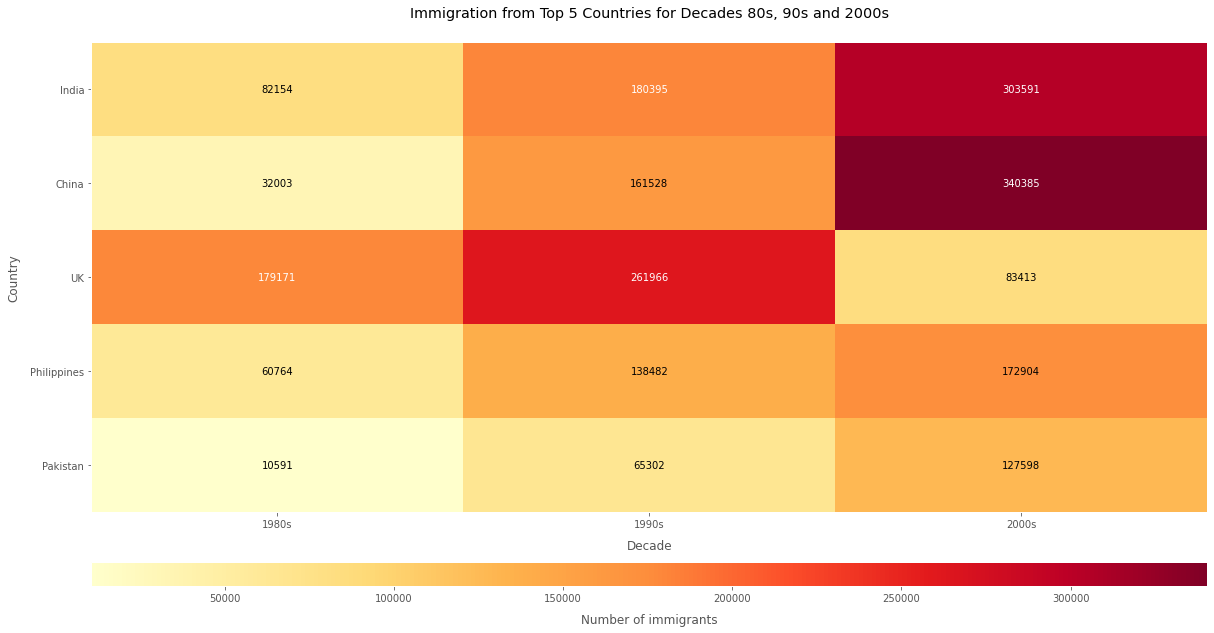

In [55]:
plt.figure(figsize=(20,10))
ax, im, cbar = heatmap(df_top5_decades.values, 
                       df_top5_decades.index,
                       df_top5_decades.columns, 
                       "YlOrRd", 
                       "Number of immigrants")
texts = annotate_heatmap(im)
ax.grid(False)
ax.set_title('Immigration from Top 5 Countries for Decades 80s, 90s and 2000s', pad=25)
ax.set_xlabel('Decade', labelpad=10)
ax.set_ylabel('Country', labelpad=10);

### Seaborn

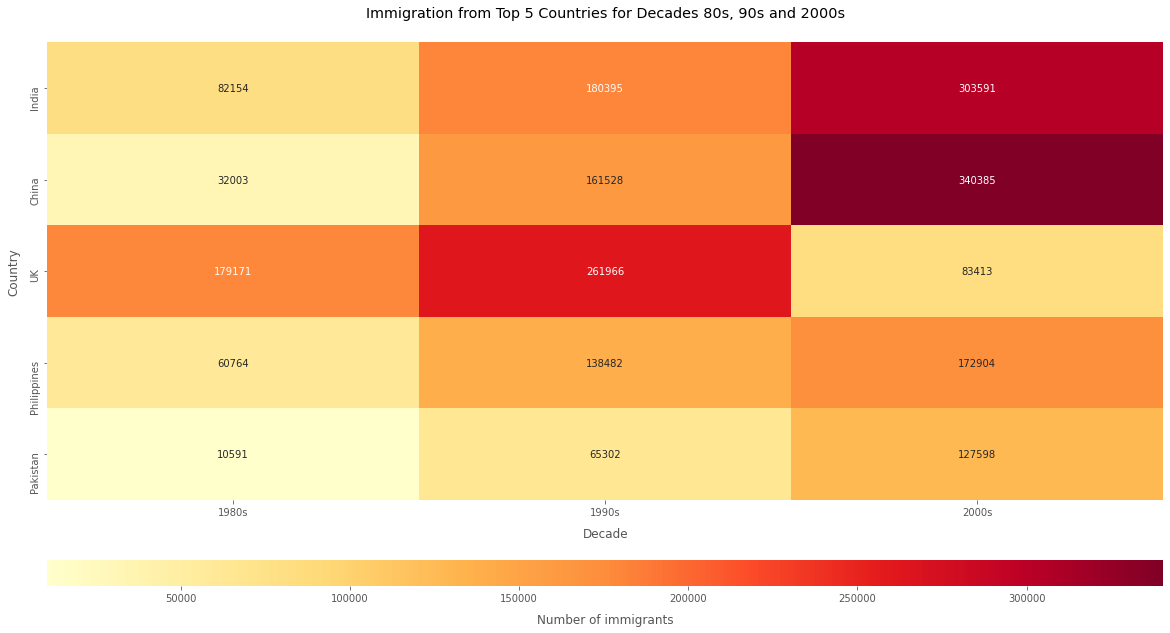

In [56]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
ax = sns.heatmap(df_top5_decades, 
                 annot=True, 
                 fmt="d", 
                 cmap="YlOrRd",
                 ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})
ax.set_title('Immigration from Top 5 Countries for Decades 80s, 90s and 2000s', pad=25)
ax.set_xlabel('Decade', labelpad=10)
ax.set_ylabel('Country', labelpad=10)
cbar_ax.set_xlabel("Number of immigrants", labelpad=10);

### Plotly

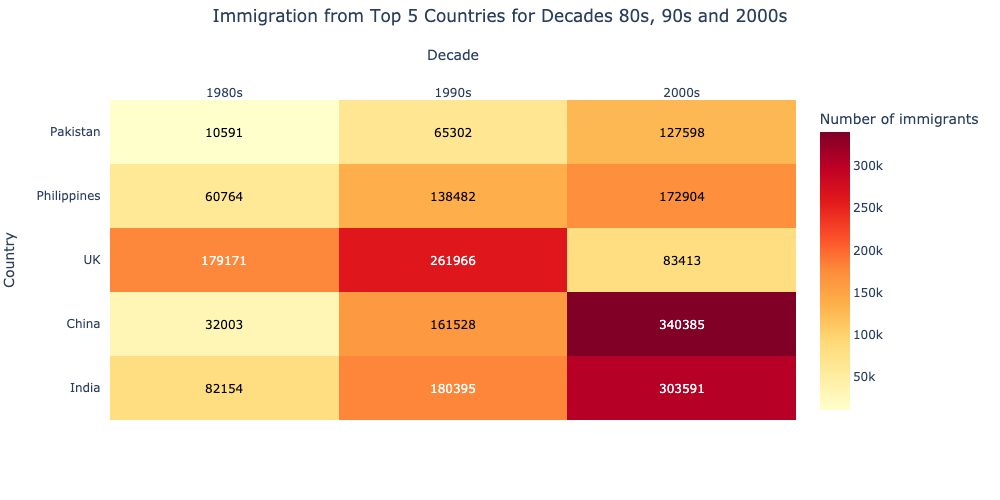

In [57]:
fig = ff.create_annotated_heatmap(z=df_top5_decades.values, 
                                  y=list(df_top5_decades.index), 
                                  x=list(df_top5_decades.columns),
                                  colorscale="YlOrRd",
                                  colorbar_title = "Number of immigrants",
                                  showscale=True)
fig = fig.update_layout(title={'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'}, 
                        xaxis_title_text="Decade",
                        yaxis_title_text="Country",
                        title_text='Immigration from Top 5 Countries for Decades 80s, 90s and 2000s',
                        width=1000, 
                        height=500)
fig.show()

As it was seen before not all countries show an uptrend. China and India are the ones with a higher number of immigrants to Canada in the last decade.


# Final Thoughts

- To make the most of both, matplotlib and seaborn should be used together. All you need to do is set the style and plots of the same type will look practically the same. Plus, since seaborn works on top of matplotlib, any matplotlib command can be used with seaborn.
- Plotly Express is very intuitive and you can use plotly express and plotly graph objects together.
- Plotly is a good library to learn, since it is used by Dash to build dashboards.

# References

1. [Data Visualization with Python](https://www.coursera.org/learn/python-for-data-visualization)
2. [Matplotlib_Immigration_visualization](https://www.kaggle.com/bavalpreet26/matplotlib-immigration-visualization)
3. [Interpreting Data through Visualization with Python Matplotlib](https://towardsdatascience.com/interpreting-data-through-visualization-with-python-matplotlib-ef795b411900)
4. [Bubble Plot with Seaborn](https://www.python-graph-gallery.com/bubble-plot-with-seaborn)
5. [Heatmap](https://www.python-graph-gallery.com/heatmap/)
6. [Creating annotated heatmaps](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html)
7. [Set Matplotlib colorbar size to match graph](https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph)
8. [Resize a figure automatically in matplotlib](https://stackoverflow.com/questions/1271023/resize-a-figure-automatically-in-matplotlib)
9. [Practical Statistics for Data Scientists: 50 Essential Concepts](https://www.amazon.com/Practical-Statistics-Data-Scientists-Essential/dp/1491952962)